In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from correction.compute import *
import fastavro
import pickle

In [3]:
#!pip install alerce
from alerce.api import AlerceAPI
client = AlerceAPI()

In [4]:
import requests

# get candid list given an object id

In [10]:
period = {}
#oid = 'ZTF19aazzpje'; period[oid] = None #'ZTF20aaelulu' #'ZTF19aazzpje' # SN
#oid = 'ZTF18aaiscil'; period[oid] = None # weird
oid = 'ZTF18abdgukn'; period[oid] = None # AGN
#oid = 'ZTF18aazxcwf'; period[oid] = 0.614515 # RRL
oid = 'ZTF17aaaedmd'; period[oid] = 500 # LPV
#oid = "ZTF19abaejrh"; period[oid] = None
avrodir = "../data_examples/avros/%s" % oid
# get candid
params = {"oid": oid}
url = "https://ztf.alerce.online"
r = requests.post(url = "%s/get_detections" % url, json = params)
detections = r.json()["result"]["detections"]
print(detections)
candids = [s["candid_str"] for s in detections]
candids

[{'candid_str': '535422023915010026', 'oid': 'ZTF17aaaedmd', 'candid': 535422023915010026, 'mjd': 58289.4220254999, 'fid': 1, 'diffmaglim': 20.731819152832, 'magpsf': 16.4545078277588, 'magap': 16.4568004608154, 'sigmapsf': 0.0359609983861446, 'sigmagap': 0.0116999996826053, 'ra': 338.0626264, 'dec': 55.1809382, 'sigmara': 0.09, 'sigmadec': 0.09, 'isdiffpos': -1, 'distpsnr1': 0.171520903706551, 'sgscore1': 0.5, 'field': 803, 'rcid': 39, 'magnr': 15.2189998626709, 'sigmagnr': 0.017000000923872, 'rb': 0.716666638851166, 'magpsf_corr': 15.6384893982061, 'magap_corr': 15.6374098232546, 'sigmapsf_corr': 0.0302244503494373, 'sigmagap_corr': 0.025590890268129, 'has_stamps': None, 'parent_candid': None}, {'candid_str': '536454383915010021', 'oid': 'ZTF17aaaedmd', 'candid': 536454383915010021, 'mjd': 58290.4543865998, 'fid': 1, 'diffmaglim': 20.9353179931641, 'magpsf': 16.3567161560059, 'magap': 16.4022998809814, 'sigmapsf': 0.0319288223981857, 'sigmagap': 0.0105999996885657, 'ra': 338.0626422,

['535422023915010026',
 '536454383915010021',
 '537455573915010014',
 '538455963915010017',
 '539454833915010014',
 '540456683915010009',
 '542466783915010010',
 '543445593915010013',
 '544472833915010012',
 '545457293915010010',
 '546473613915010008',
 '547325193915010009',
 '549442713915010014',
 '550400123915010008',
 '550446853915010008',
 '551454883915010008',
 '553411593915010010',
 '553449063915010009',
 '556366643915010008',
 '558428623915010017',
 '558464593915010008',
 '559413693915010009',
 '559447093915010010',
 '560464913915010011',
 '561401783915010013',
 '562407153915010006',
 '562447123915010010',
 '564361853915010026',
 '564427593915010049',
 '565405523915010010',
 '565458043915010019',
 '566388403915010015',
 '567431093915010013',
 '567466433915010015',
 '568449313915010011',
 '569455403915010005',
 '569474803915010009',
 '570454583915010010',
 '570474093915010015',
 '571455933915010010',
 '571471953915010015',
 '572414213915010005',
 '573400243915010009',
 '573473913

# Get avro files

In [15]:
#df = []
#if not os.path.exists(avrodir):
#    os.makedirs(avrodir)
#for candid in candids:# get avro
#    print(candid)
#    params = {"oid": oid, "candid": candid}
#    url = "http://avro.alerce.online"
#    r = requests.get(url = "%s/get_avro" % url, params = params)
#    with open("%s/%s.avro" % (avrodir, candid), 'wb') as f:
#        f.write(r.content)
##df = pd.concat(df)
##df.head()

# simulate alert stream

In [16]:
avros = sorted(os.listdir(avrodir))
avros

['1000163263915010025.avro',
 '1000191793915010025.avro',
 '1004208553915010017.avro',
 '1005207463915010022.avro',
 '1006192913915010030.avro',
 '1007191943915010022.avro',
 '1008191123915010018.avro',
 '1009192473915010017.avro',
 '1010180383915010015.avro',
 '1010214283915010013.avro',
 '1010229493915010024.avro',
 '1010236313915010021.avro',
 '1011149423915010012.avro',
 '1011181063915010019.avro',
 '1012179623915010017.avro',
 '1012229203915010023.avro',
 '1012236013915010014.avro',
 '1013148533915010022.avro',
 '1013177143915010025.avro',
 '1014177733915010020.avro',
 '1014227773915010023.avro',
 '1014234603915010018.avro',
 '1015149753915010018.avro',
 '1015177663915010015.avro',
 '1015229173915010022.avro',
 '1015235993915010027.avro',
 '1016149823915010015.avro',
 '1016177703915010022.avro',
 '1016219763915010015.avro',
 '1016228143915010016.avro',
 '1016234973915010019.avro',
 '1017177933915010021.avro',
 '1017220813915010028.avro',
 '1017229183915010018.avro',
 '101723601391

In [13]:
# return dataframe with non_detection data (it could be add to the DB)
def add_non_detection(oid, mjd, candidate):
        
    # selected fields for dataframe
    fields = ["fid", "diffmaglim"]#, 'magzpsci', 'magzpsciunc', 'magzpscirms', 'clrcoeff', 'clrcounc']
    df = pd.DataFrame(data = [[oid, mjd] + [candidate[field] for field in fields]],
                            columns=[["oid", "mjd"] + fields][0])
    
    return df

# return dataframe with detection data (it could be add to the DB)
def add_detection(oid, candid, stellar_object, candidate):
    
    # candidate time
    candidate["mjd"] = candidate["jd"] - 2400000.5
    
    # filter
    fid = candidate["fid"]    
        
    # object
    stellar_object, stellar_magstats = validate_object(candidate, is_first_detection[fid], stellar_object)
    corr_detection, corr_magstats, flag = validate_magnitudes(candidate)
    magpsf_corr, sigmapsf_corr, sigmapsf_corr_ext = apply_correction(candidate)
    
    # Update database here!
    
    # selected fields for dataframe
    fields = ["fid", "has_stamp", "magpsf", "sigmapsf", "isdiffpos", "rfid", "magnr", "distnr", "chinr", "sharpnr", "sgscore1", "distpsnr1", "mjd", "ra", "dec", "field", "rcid"]
    df = pd.DataFrame(data = [[oid, candid] + [magpsf_corr, sigmapsf_corr, sigmapsf_corr_ext] + [candidate[field] for field in fields]  + [stellar_object, stellar_magstats] + [corr_detection, corr_magstats, flag]],
                            columns=[["oid", "candid"] + ["magpsf_corr", "sigmapsf_corr", "sigmapsf_corr_ext"] + fields][0]  + ["stellar_o", "stellar_m"] + ["corr_d", "corr_m", "flag"])

    return df

,magpsf_corr,magpsf,sigmapsf_corr,sigmapsf_corr_ext,isdiffpos,has_stamp,fid,magnr,distnr,chinr,sharpnr,sgscore1,distpsnr1,stellar_o,stellar_m,corr_m,corr_d,flag
0,18.801994,15.259800,0.925713,1.034124,f,False,1,15.219000,0.235058,0.674,-0.024,0.5,0.096587,True,True,None,True,False
0,100.000000,15.215400,100.000000,100.000000,f,False,1,15.219000,0.171645,0.674,-0.024,0.5,0.096587,True,True,None,True,False
0,19.667224,15.237200,0.960113,1.402742,f,False,1,15.219000,0.119518,0.674,-0.024,0.5,0.096587,True,True,None,True,False
0,15.878355,13.101000,0.030177,0.210828,f,False,2,13.020000,0.134320,0.549,0.018,0.5,0.096587,True,True,None,True,False
0,19.721796,15.236300,1.344770,1.721882,f,False,1,15.219000,0.128971,0.674,-0.024,0.5,0.096587,True,True,None,True,False
0,15.804925,13.106900,0.146151,0.243700,f,False,2,13.020000,0.105027,0.549,0.018,0.5,0.096587,True,True,None,True,False
0,100.000000,15.212100,100.000000,100.000000,f,False,1,15.219000,0.119074,0.674,-0.024,0.5,0.096587,True,True,None,True,False
0,20.346248,15.228700,2.758182,3.355735,f,False,1,15.219000,0.121751,0.674,-0.024,0.5,0.096587,True,True,None,True,False
0,16.075889,13.087100,0.212975,0.328640,f,False,2,13.020000,0.132020,0.549,0.018,0.5,0.096587,True,True,None,True,False
0,100.000000,15.212400,100.000000,100.000000,f,False,1,15.219000,0.053864,0.674,-0.024,0.5,0.096587,True,True,None,True,False


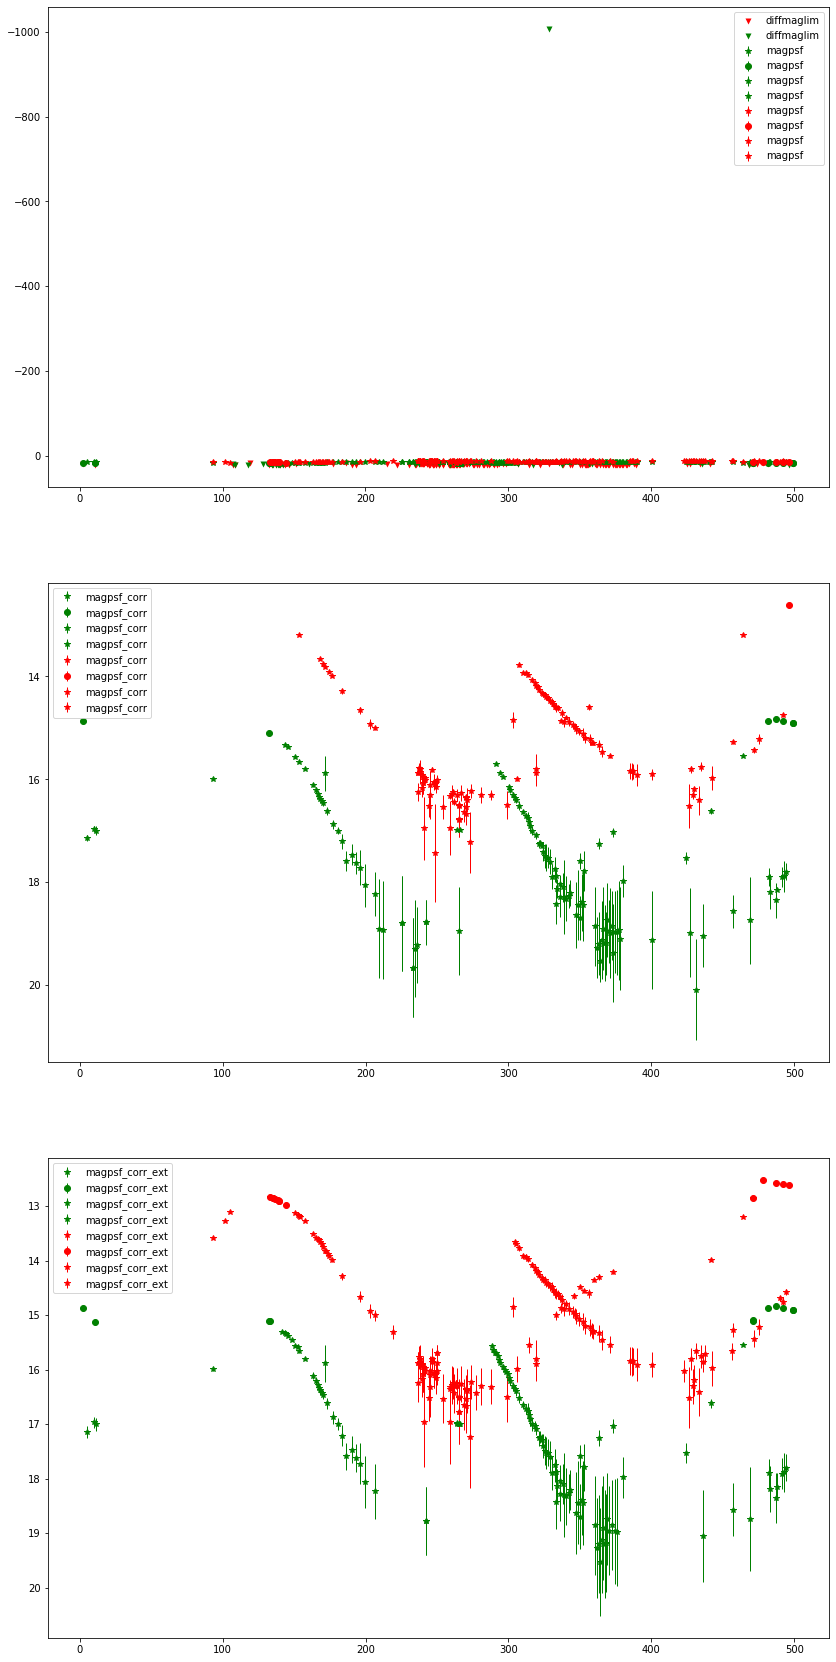

In [14]:
is_first_detection = {"object": True, 1: True, 2: True}
stellar_object = False
df_det = pd.DataFrame()
df_nondet = pd.DataFrame()
candids = set()
mjds = set()

# analyze avros
for idx, avro in enumerate(avros): # = '../data_examples/avros/1184159740015015000.avro'
    with open("%s/%s" % (avrodir, avro), "rb") as f:
        try:
            reader = fastavro.reader(f)
            data = reader.next()
            skip = False
        except: 
            skip = True

    if skip:
        continue
    
    # main detection candid
    candid = data["candidate"]["candid"]
    fid = data["candidate"]["fid"]

    # search new detections or non-detections in previous candidates
    if data["prv_candidates"] is not None:
        for prv in data["prv_candidates"]:
            # non-detection
            if prv["candid"] is None:
                mjd = float(prv["jd"]) - 2400000.5
                if mjd not in mjds:
                    mjds.add(mjd)
                    df_nondet = df_nondet.append(add_non_detection(oid, mjd, prv))
            # detections
            else:
                candid_new = prv["candid"]
                if candid_new not in candids:
                    candids.add(candid_new)
                    # add missing keys
                    for key in set(data["candidate"].keys()).difference(set(prv.keys())):
                        prv[key] = data["candidate"][key]
                    prv["parent_candid"] = candid
                    df_det = df_det.append(add_detection(oid, candid_new, stellar_object, prv))

    # add main detection
    candids.add(candid)
    data["candidate"]["parent_candid"] = 0
    df_det = df_det.append(add_detection(oid, candid, stellar_object, data["candidate"]))
   
    # show first stamp
    if idx == 0:
        client.plot_stamp(oid, candid)
    
    is_first_detection["object"] = False
    is_first_detection[fid] = False

pd.options.display.max_rows = 999
display(df_det[["magpsf_corr", "magpsf", "sigmapsf_corr", "sigmapsf_corr_ext", "isdiffpos", "has_stamp", "fid", "magnr", "distnr", "chinr", "sharpnr", "sgscore1", "distpsnr1", "stellar_o", "stellar_m", "corr_m", "corr_d", "flag"]])

# plot
fig, ax = plt.subplots(nrows = 3, sharey = False, figsize=(14, 30))
colors = {1: 'g', 2: 'r'}

# plot non detections
for fid in df_nondet.fid.unique():
    color = colors[fid]
    mask = (df_nondet.fid == fid)
    color = colors[fid]

    if period[oid] is None:
        for idx in range(1):
            ax[idx].scatter(df_nondet.loc[mask].mjd, df_nondet.loc[mask].diffmaglim, c=color, marker="v", label="diffmaglim", lw=0)
    else:
        for idx in range(1):
            ax[idx].scatter(np.mod(df_nondet.loc[mask].mjd, period[oid]), df_nondet.loc[mask].diffmaglim, c=color, marker='v', label="diffmaglim", lw=0)

# plot detections
for fid in df_det.fid.unique():
    for pos in df_det.isdiffpos.unique():
        #if fid == 2:
        #    continue
        mask_diff = (df_det.fid == fid) & (df_det.isdiffpos == pos) & (df_det.sigmapsf < 1)
        mask_corr = (df_det.fid == fid) & (df_det.isdiffpos == pos) & (df_det.sigmapsf_corr < 1)
        mask_corr_ext = (df_det.fid == fid) & (df_det.isdiffpos == pos) & (df_det.sigmapsf_corr_ext < 1)
        
        color = colors[fid]
        marker = 'o' if pos == 't' else '*'

        if period[oid] is None:
            ax[0].errorbar(df_det.loc[mask_diff].mjd, df_det.loc[mask_diff].magpsf, yerr=df_det.loc[mask_diff].sigmapsf, c=color, marker=marker, lw=0, elinewidth=1, alpha=1, label="magpsf")
            ax[1].errorbar(df_det.loc[mask_corr].mjd, df_det.loc[mask_corr].magpsf_corr, yerr=df_det.loc[mask_corr].sigmapsf_corr, c=color, marker=marker, lw=0, elinewidth=1, alpha=1, label="magpsf_corr")
            ax[2].errorbar(df_det.loc[mask_corr_ext].mjd, df_det.loc[mask_corr_ext].magpsf_corr, yerr=df_det.loc[mask_corr_ext].sigmapsf_corr_ext, c=color, marker=marker, lw=0, elinewidth=1, alpha=1, label="magpsf_corr_ext")
        else:
            ax[0].errorbar(np.mod(df_det.loc[mask_diff].mjd, period[oid]), df_det.loc[mask_diff].magpsf, yerr=df_det.loc[mask_diff].sigmapsf, c=color, marker=marker, lw=0, elinewidth=1, alpha=1, label="magpsf")
            ax[1].errorbar(np.mod(df_det.loc[mask_corr].mjd, period[oid]), df_det.loc[mask_corr].magpsf_corr, yerr=df_det.loc[mask_corr].sigmapsf_corr, c=color, marker=marker, lw=0, elinewidth=1, alpha=1, label="magpsf_corr")
            ax[2].errorbar(np.mod(df_det.loc[mask_corr_ext].mjd, period[oid]), df_det.loc[mask_corr_ext].magpsf_corr, yerr=df_det.loc[mask_corr_ext].sigmapsf_corr_ext, c=color, marker=marker, lw=0, elinewidth=1, alpha=1, label="magpsf_corr_ext")

for i in range(3):
    ax[i].set_ylim(ax[i].get_ylim()[::-1])
    ax[i].legend()

In [30]:
%%timeit
for i in range(100000):
    a = np.square(2.45)

10 loops, best of 3: 364 ms per loop
